In [1]:
using CairoMakie
using Oceananigans
using Oceananigans.Fields
using Oceananigans.AbstractOperations: volume
using Statistics

In [2]:
turb_filename = "../output/turbulent_convection_hills_section_snapshots.jld2"
b_timeseries = FieldTimeSeries(turb_filename, "b")
xc, yc, zc = nodes(b_timeseries[1])
times = b_timeseries.times;

b = interior(b_timeseries)[:,1,:,130];

In [64]:
H = 1.0            # vertical domain extent
Lx = 8H            # horizontal domain extent
Ly = H/4
Nx, Ny, Nz = 2048, 64, 256 # meridional, zonal, vertical resolution

h₀ = 0.6H
hill_length = Lx/32
channel_width = Ly/8

hill_1(x) = (2/3)h₀ * exp(-(x-0.0Lx/2)^2 / 2hill_length^2)
hill_2(x) =      h₀ * exp(-(x-0.5Lx/2)^2 / 2hill_length^2)
channel(y) = (1 - (1/3)*exp(-(y^2) / 2channel_width^2))
seafloor(x,y) = - H + (hill_1(x) + hill_2(x)) * channel(y)

seafloor (generic function with 1 method)

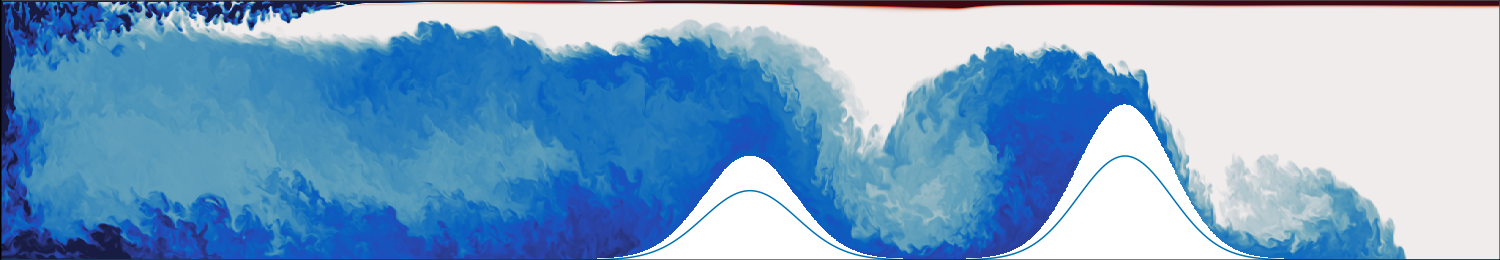

In [66]:
fig = Figure(resolution = (1500, 260), fontsize=20, figure_padding = 0)
ax = Axis(fig[1,1], backgroundcolor = :white)
b[b.==0].=NaN
hm = heatmap!(xc[:,1,:], zc[:,1,:], -b, colorrange = (-0.05, 0.05), colormap = Reverse(:balance))
#Colorbar(fig[1,2], hm, label=L"ρ");
hidedecorations!(ax)
lines!(ax, [-4, -4], [-1,0], color=:black, linewidth=3)
x = -4:0.01:4
bot = seafloor.(x, 0)
lines!(ax, x, bot)
save("../figures/horizontal_convection_initial.png", fig, px_per_unit=3)
fig

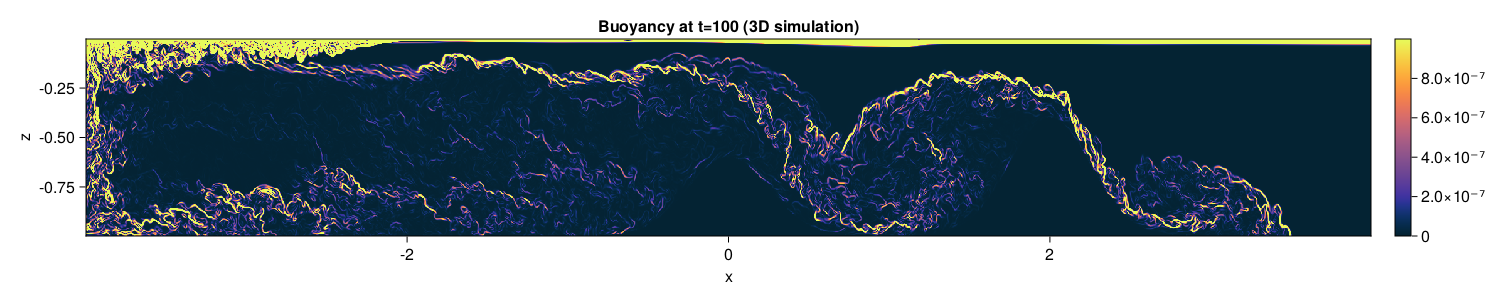

In [11]:
turb_filename = "../output/turbulent_convection_hills_section_snapshots.jld2"
χ_timeseries = FieldTimeSeries(turb_filename, "χ")
xc, yc, zc = nodes(χ_timeseries[1])
times = χ_timeseries.times;

χ = interior(χ_timeseries)[:,1,:,130];

fig = Figure(resolution = (1500, 300))
ax = Axis(fig[1,1], xlabel = "x", ylabel= "z", title = "Buoyancy at t=100 (3D simulation)")#, limits=((-4, -2),(-0.2, 0)))
hm = heatmap!(xc[:,1,:], zc[:,1,:], χ, colorrange = (0, 1e-6), colormap = :thermal)
Colorbar(fig[1,2], hm);
fig

200.0

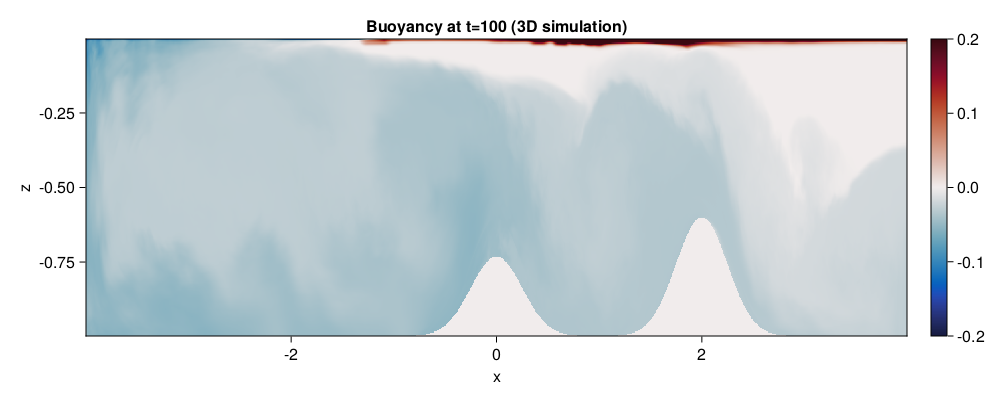

In [13]:
turb_filename = "../output/turbulent_convection_hills_zonal_time_means.jld2"
b_timeseries = FieldTimeSeries(turb_filename, "b")
xc, yc, zc = nodes(b_timeseries[1])
times = b_timeseries.times;
print(times[end])

b = mean(interior(b_timeseries)[:,:,:,end], dims=(2))[:,1,:];

fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1], xlabel = "x", ylabel= "z", title = "Buoyancy at t=100 (3D simulation)")
hm_ζ = heatmap!(xc[:,1,:], zc[:,1,:], b, colorrange = (-0.2, 0.2), colormap = :balance)
Colorbar(fig[1,2], hm_ζ);
fig

In [5]:
size(b_timeseries)

(2048, 64, 256, 2)

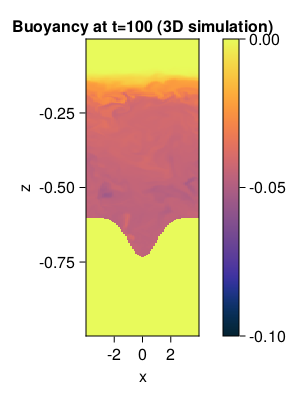

In [12]:
b = interior(b_timeseries)[1024,:,:,end]

fig = Figure(resolution = (300, 400))
ax = Axis(fig[1,1], xlabel = "x", ylabel= "z", title = "Buoyancy at t=100 (3D simulation)")
hm_ζ = heatmap!(xc[:,1,:], zc[:,1,:], b, colorrange = (-0.1, 0.), colormap = :thermal)
Colorbar(fig[1,2], hm_ζ);
fig

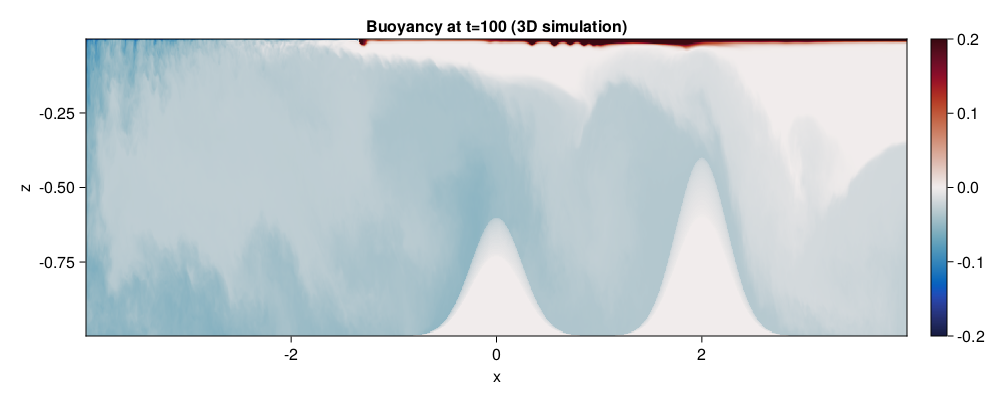

In [14]:
turb_filename = "../output/turbulent_convection_hills_state.jld2"
b_timeseries = FieldTimeSeries(turb_filename, "b")
xc, yc, zc = nodes(b_timeseries[1])
times = b_timeseries.times;

b = mean(interior(b_timeseries)[:,:,:,end], dims=(2))[:,1,:];

fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1], xlabel = "x", ylabel= "z", title = "Buoyancy at t=100 (3D simulation)")
hm_ζ = heatmap!(xc[:,1,:], zc[:,1,:], b, colorrange = (-0.2, 0.2), colormap = :balance)
Colorbar(fig[1,2], hm_ζ);
fig

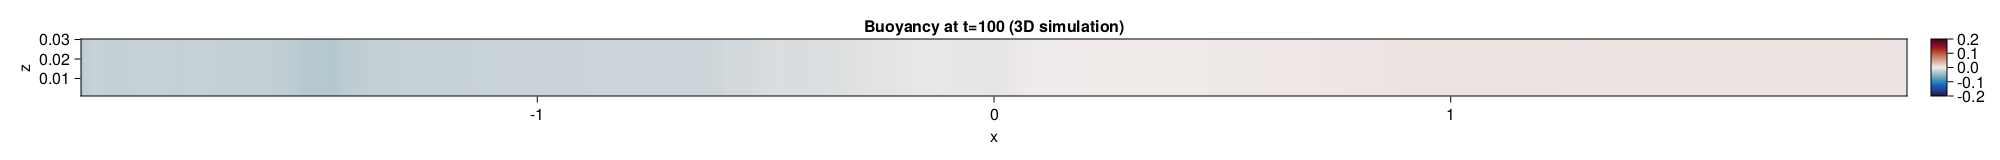

In [60]:
turb_filename = "../output/turbulent_convection_hills_zonal_time_means_3Dtest.jld2"
b_timeseries = FieldTimeSeries(turb_filename, "b")
xc, yc, zc = nodes(b_timeseries[1])
times = b_timeseries.times;

b = mean(interior(b_timeseries)[:,:,:,end], dims=(3))[:,:,1];

fig = Figure(resolution = (2000, 160))
ax = Axis(fig[1,1], xlabel = "x", ylabel= "z", title = "Buoyancy at t=100 (3D simulation)")
hm_ζ = heatmap!(xc[:,1,:], yc[:,1,:], b, colorrange = (-0.2, 0.2), colormap = :balance)
Colorbar(fig[1,2], hm_ζ);
fig

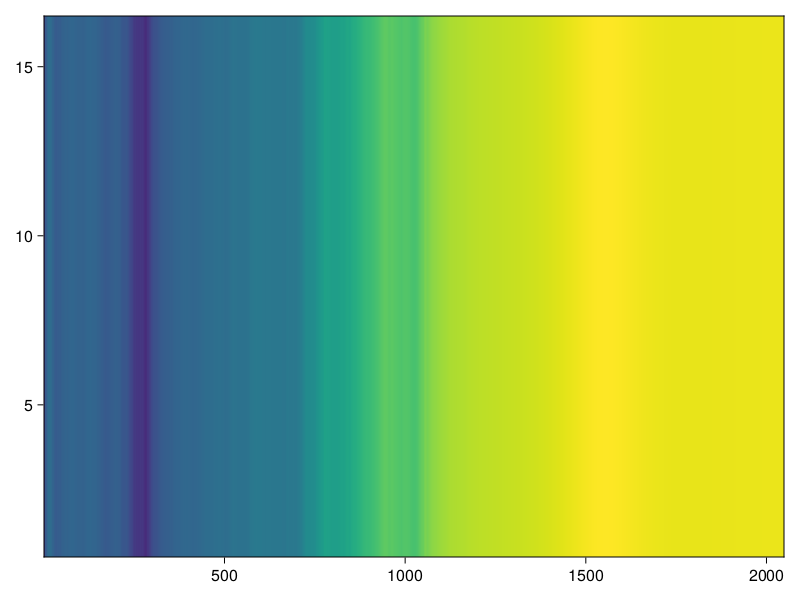

In [53]:
heatmap(b)

In [50]:
size(b_timeseries)

(2048, 16, 1, 6)

In [26]:
H = 1
Lx = 4H

const h₀ = 0.7*H
const width = 0.05*Lx
hill_1(x) = h₀ * exp(-(x+Lx/8)^2 / 2width^2)
hill_2(x) = 0.75*h₀ * exp(-(x-Lx/4)^2 / 2width^2)
bot(x,y) = - H + (hill_1(x) + hill_2(x)) * (1 - 0.3*exp(-(y-H/2)^2 / (0.1H)))

bot (generic function with 1 method)

In [27]:
b = bot.(collect(-Lx/2:Lx/100:Lx/2), reshape(collect(0:H/31:H), (1,32)));

In [29]:
hm = heatmap(b)
Colorbar(hm)

LoadError: MethodError: no method matching _block(::Type{Colorbar}, ::Makie.FigureAxisPlot)

[0mClosest candidates are:
[0m  _block(::Type{<:Makie.Block}, [91m::Union{GridPosition, GridSubposition}[39m, [91m::Any...[39m; kwargs...)
[0m[90m   @[39m [35mMakie[39m [90m~/.julia/packages/Makie/1hq9u/src/makielayout/[39m[90m[4mblocks.jl:261[24m[39m
[0m  _block(::Type{<:Makie.Block}, [91m::Union{Figure, Scene}[39m, [91m::Any...[39m; bbox, kwargs...)
[0m[90m   @[39m [35mMakie[39m [90m~/.julia/packages/Makie/1hq9u/src/makielayout/[39m[90m[4mblocks.jl:272[24m[39m


In [123]:
const H = 1.0            # vertical domain extent
const Lx = 4H            # horizontal domain extent
const Ly = H/16
const Nx, Ny, Nz = 2048, 32, 512 # meridional, zonal, vertical resolution

const Pr = 1.0     # Prandtl number
const Ra = 1e12    # Rayleigh number

const h₀ = 0.5*H
const width = 0.05*Lx
hill_1(x) = h₀ * exp(-(x+Lx/8)^2 / 2width^2)
hill_2(x) = 0.75*h₀ * exp(-(x-Lx/4)^2 / 2width^2)
bot(x,y) = - H + (hill_1(x) + hill_2(x)) * (1 - (1. /3)*exp(-(y-Ly/2)^2 / (0.25Ly)))

LoadError: cannot declare H constant; it already has a value

In [159]:
H = 1.0            # vertical domain extent
Lx = 4H            # horizontal domain extent
Ly = H/16
Nx, Ny, Nz = 2048, 32, 512 # meridional, zonal, vertical resolution

Pr = 1.0     # Prandtl number
Ra = 1e12    # Rayleigh number

h₀ = 0.5*H
width = 0.05*Lx
hill_1(x) = h₀ * exp(-(x+Lx/8)^2 / 2width^2)
hill_2(x) = 0.75*h₀ * exp(-(x-Lx/4)^2 / 2width^2)
bot(x,y) = - H + (hill_1(x) + hill_2(x)) * (1 - (1. /3)*exp(-(y-Ly/2)^2 / 2(0.2Ly)^2))

bot (generic function with 1 method)

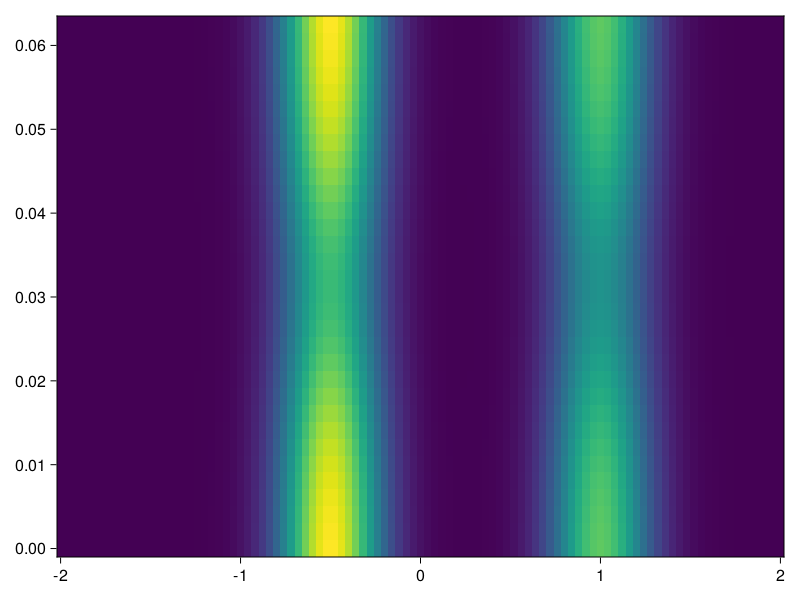

In [160]:
x = collect(-Lx/2:Lx/100:Lx/2)
y = collect(0:Ly/31:Ly)
b = bot.(x, reshape(y, (1,32)));
heatmap(x, y, b)

In [138]:
Ly

0.0625